## Forecasting LSTM with SSI at 121.5nm for 1, 2 and 3 Days NEW

This is a notebook created to train the LSTM to forecast TSI, and to make tests with different settings looking for the best one. It is being costumized with the purpose to generate results to the work will be submitted to JSWSC.

In [1]:
from library import *
from matplotlib import dates

Using TensorFlow backend.
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib

In [2]:
np.random.seed(7)

In [3]:
oPath = './output_files/Scaling/SSI/'

In [120]:
# interval='1'
# timeTerm='1 Day'
# interval='2'
# timeTerm='2 Days'
interval='3'
timeTerm='3 Days'

In [121]:
P1 = np.asarray(np.loadtxt('./partial_output_files/412D/P_121.5_412dias'+interval+'days.csv'))
T1 = np.asarray(np.loadtxt('./partial_output_files/412D/T_121.5_412dias'+interval+'days.csv'))

P2 = np.asarray(np.loadtxt('./partial_output_files/301D/P_121.5_301dias'+interval+'days.csv'))
T2 = np.asarray(np.loadtxt('./partial_output_files/301D/T_121.5_301dias'+interval+'days.csv'))

P3 = np.asarray(np.loadtxt('./partial_output_files/129D/P_121.5_129dias'+interval+'days.csv'))
T3 = np.asarray(np.loadtxt('./partial_output_files/129D/T_121.5_129dias'+interval+'days.csv'))
Time3 = np.asarray(np.loadtxt('./partial_output_files/129D/Time_121.5_129dias'+interval+'days.csv'))

P4 = np.asarray(np.loadtxt('./partial_output_files/81D/P_121.5_81dias'+interval+'days.csv'))
T4 = np.asarray(np.loadtxt('./partial_output_files/81D/T_121.5_81dias'+interval+'days.csv'))
Time4 = np.asarray(np.loadtxt('./partial_output_files/81D/Time_121.5_81dias'+interval+'days.csv'))

outputPath = oPath+'121.5_'+timeTerm+'Exp'

In [122]:
P1 = np.transpose(P1)
T1 = T1.reshape(-1,1)

P2 = np.transpose(P2)
T2 = T2.reshape(-1,1)

P3 = np.transpose(P3)
T3 = T3.reshape(-1,1)

P4 = np.transpose(P4)
T4 = T4.reshape(-1,1)

PT = P3
TT = T3
testSet="set3"
print(P1.shape)
print(P2.shape)
print(P3.shape)
print(T1.shape)
#print(Time1.shape)

(410, 40)
(299, 40)
(127, 40)
(410, 1)


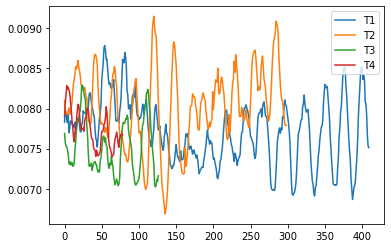

In [123]:
plt.plot(T1, label='T1')
plt.plot(T2, label='T2')
plt.plot(T3, label='T3')
plt.plot(T4, label='T4')
plt.legend()

Standarizing the data:

In [124]:
# MinMax [0,1] for both IO:
scalerIn = MinMaxScaler(feature_range=(0, 1))
scalerOut = MinMaxScaler(feature_range=(0, 1))
# scaling = "O01"

# # MinMax [0,1] for Input and MinMax [-1,1] for Output:
# scalerIn = MinMaxScaler(feature_range=(0, 1))
# scalerOut = MinMaxScaler(feature_range=(-1, 1))
# scaling = "O-11"

# # MinMax [0,1] for Input and Standard for Output:
# scalerIn = MinMaxScaler(feature_range=(0, 1))
# scalerOut = StandardScaler()
# scaling = "OStd"

In [125]:
scalerIn.fit(np.concatenate((P1,P2,P4)))
scalerOut.fit(np.concatenate((T1,T2,T4)))

x1 = scalerIn.transform(P1)
x2 = scalerIn.transform(P2)
x3 = scalerIn.transform(P3)
x4 = scalerIn.transform(P4)
xt = scalerIn.transform(PT)

y1 = scalerOut.transform(T1)
y2 = scalerOut.transform(T2)
y3 = scalerOut.transform(T3)
y4 = scalerOut.transform(T4)
yt = scalerOut.transform(TT)

Defining a mask value (an outlier value) to replace the *nan* values of the output vector. (The nets can't deal with *nan* values)

In [126]:
units = 5
epochs = 50
shuffle = True
test_size = 0.2
#loss='mse'
loss = 'mean_squared_error'
optimizer = 'adam'
#optimizer = 'rmsprop'
# afunction = 'relu'
dropout = 0.2
lookback = 1

In [127]:
# outputPath = './output_files/Activation/121.5_'
net = "gru"
# net = "lstm"
mse = []
testsqtd = 1
error =[]
lstm = []
# gru = []

# expName = outputPath + "_simple_HU2"
# expName = outputPath + "_lstmHU1"
# expName = outputPath + "_gruHU2"

# expName = outputPath + "lstm_"+afunction
# expName = outputPath + "gru_"+afunction

# expName = outputPath + net+"_" + scaling
# expName = outputPath + "gru_" + scaling
expName = "teste"

#unitsNumbers = range(15, 16)
# unitsNumbers = range(1, 11, 1)
# unitsNumbers = range(10,51,5)
#epochsNumbers = [50, 60, 80, 100, 150, 300]
# batchSizes = [32,64,128,256,512]
lookbacks = range(1,2)
#dropouts = [0.,0.1,0.2,0.40,0.6]
batchRates = [0.01]

for batchRate in batchRates:

    p = (np.concatenate((x1,x2,x4)))
    t = (np.concatenate((y1,y2,y4)))

    sxTest = xt
    syTest = yt

    sxTrain, sxVal, syTrain, syVal= train_test_split(p, t, test_size=test_size, shuffle=shuffle)

    sxTrain = sxTrain.reshape((sxTrain.shape[0], lookback, sxTrain.shape[1])) 
    sxVal = sxVal.reshape((sxVal.shape[0],  lookback, sxVal.shape[1]))
    sxTest = sxTest.reshape((sxTest.shape[0],  lookback, sxTest.shape[1])) 

    batch_size = int(sxTrain.shape[0] * batchRate)

    for j in range(testsqtd):
        
        #keras.backend.clear_session()
        
#         print('\n\nTest #'+str(j+1)+' for '+str(units)+' units:') # used for batch_size tests
        #print('\n\nTest #'+str(j+1)+' for lookback = '+str(lookback)+':') # used for lookback tests
        #print('\n\nTest #'+str(j+1)+' for '+str(units)+' units:') # used for units number tests
        #print('\n\nTest #'+str(j+1)+' for dropout rate = '+str(dropout)+":") # used for dropout tests
        #print("Teste #"+str(j+1)+" para batch rate of "+str(batchRate)+"%: "+str(batch_size))
        print('\n\nTest #'+str(j+1))
        
        model = Sequential()
#         model.add(SimpleRNN(units=units, input_shape=(sxTrain.shape[1],sxTrain.shape[2])))#, return_sequences=True)) # , return_sequences=True
#         model.add(LSTM(units=units, input_shape=(sxTrain.shape[1],sxTrain.shape[2])))#,activation=afunction))#, return_sequences=True)) # , return_sequences=True
        model.add(GRU(units=units, input_shape=(sxTrain.shape[1],sxTrain.shape[2])))#,activation=afunction))#, return_sequences=True)) # , return_sequences=True
        #model.add(LSTM(units=10))
#         model.add(Dropout(dropout))
        model.add(Dense(1))
        model.compile(loss=loss, optimizer=optimizer)

        # checkpoint
        filepath = expName+'.hdf5'
        checkpoint = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min')
        callbacks_list = [checkpoint]
        
        # Fit the model
        f = model.fit(sxTrain, syTrain, epochs=epochs, batch_size=batch_size, validation_data=(sxVal,syVal), callbacks=callbacks_list)

        #Load the best weights
        model.load_weights(filepath)

        #Compile model (required to make predictions)
        model.compile(loss=loss, optimizer=optimizer) #, metrics=['accuracy'])
        
        syTrainP = model.predict(sxTrain)
        syValP = model.predict(sxVal)
        syTestP = model.predict(sxTest)
        
        yTestP = scalerOut.inverse_transform(syTestP)
        yTest = scalerOut.inverse_transform(syTest)

        rrnR2 = r2_score(yTest, yTestP)
        rrnR, a = stats.pearsonr(np.squeeze(yTest), np.squeeze(yTestP))
        rrnMSE = mean_squared_error(yTest, yTestP)
        rrnMAPE = mean_absolute_percentage_error(yTest, yTestP)

        error.append([j, np.min(f.history['val_loss'])])
        lstm.append([rrnR2, rrnR, rrnMSE, rrnMAPE])
#         gru.append([rrnR2, rrnR, rrnMSE, rrnMAPE])
        
        print('net R2: {:2.2%} Corr: {:2.2%} MSE: {:2.2} MAPE: {:2.2%}'.format(rrnR2, rrnR, rrnMSE, rrnMAPE))
np.savetxt(expName+'.csv',lstm)



Test #1
Train on 630 samples, validate on 158 samples
Epoch 1/50
630/630 [==============================] - 4s 6ms/step - loss: 0.0778 - val_loss: 0.0266
Epoch 2/50
630/630 [==============================] - 0s 623us/step - loss: 0.0216 - val_loss: 0.0247
Epoch 3/50
630/630 [==============================] - 0s 649us/step - loss: 0.0193 - val_loss: 0.0232
Epoch 4/50
630/630 [==============================] - 0s 627us/step - loss: 0.0178 - val_loss: 0.0219
Epoch 5/50
630/630 [==============================] - 0s 628us/step - loss: 0.0167 - val_loss: 0.0210
Epoch 6/50
630/630 [==============================] - 0s 619us/step - loss: 0.0159 - val_loss: 0.0201
Epoch 7/50
630/630 [==============================] - 0s 612us/step - loss: 0.0152 - val_loss: 0.0193
Epoch 8/50
630/630 [==============================] - 0s 634us/step - loss: 0.0148 - val_loss: 0.0190
Epoch 9/50
630/630 [==============================] - 0s 661us/step - loss: 0.0146 - val_loss: 0.0182
Epoch 10/50
630/630 [=======

In [128]:
# make predictions
syTrainP = model.predict(sxTrain)
syValP = model.predict(sxVal)   

syTrain = syTrain

yTrain = scalerOut.inverse_transform(syTrain)
yTrainP = scalerOut.inverse_transform(syTrainP)

yVal = scalerOut.inverse_transform(syVal)
yValP = scalerOut.inverse_transform(syValP)


#### Training and Validation Losses Histories

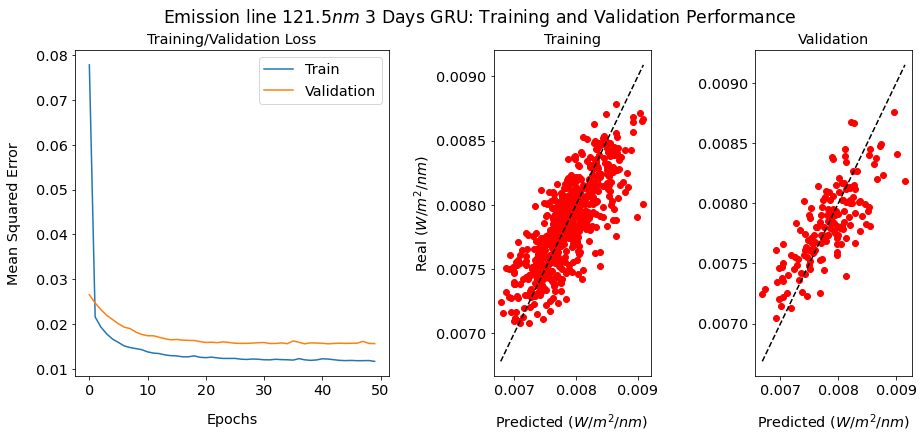

In [129]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [2, 1, 1]})

plt.subplots_adjust(wspace=0.5)#, hspace=None)
plt.suptitle(r"Emission line $121.5nm$ "+timeTerm+" "+net.upper()+": Training and Validation Performance", fontsize='xx-large')

ax1.plot(f.history['loss'], label='Train')
ax1.plot(f.history['val_loss'], label='Validation')
ax1.set_title('Training/Validation Loss', fontsize='x-large')
ax1.set_xlabel('Epochs', labelpad=15, fontsize='x-large')
ax1.set_ylabel('Mean Squared Error', labelpad=15, fontsize='x-large')
ax1.legend(fontsize='x-large')
ax1.tick_params(axis='x', labelsize='x-large' ) 
ax1.tick_params(axis='y', labelsize='x-large' ) 

ax2.scatter(yTrain,yTrainP, color='red')
ax2.set_xlabel('Predicted ($W/m^2/nm$)', labelpad=15, fontsize='x-large')
ax2.set_ylabel('Real ($W/m^2/nm$)', fontsize='x-large')
ax2.set_title('Training', fontsize='x-large')
#plt.plot([-2,2],[-2,2])
ax2.plot([yTrain.min(), yTrain.max()], [yTrain.min(), yTrain.max()], color='black', 
         linestyle='--', label='optimal')
ax2.tick_params(axis='x', labelsize='x-large' ) 
ax2.tick_params(axis='y', labelsize='x-large' ) 

ax3.scatter(yVal,yValP, color='red')
ax3.set_xlabel('Predicted ($W/m^2/nm$)', labelpad=15, fontsize='x-large')
# ax3.set_ylabel('Real ($W/m^2/nm$)', fontsize='xx-large')
# ax3.set_yticks([])
ax3.set_title('Validation', fontsize='x-large')
#plt.plot([-2,2],[-2,2])
ax3.plot([yVal.min(), yVal.max()], [yVal.min(), yVal.max()], color='black', 
         linestyle='--', label='optimal')
ax3.tick_params(axis='x', labelsize='x-large') 
ax3.tick_params(axis='y', labelsize='x-large' ) 

#fig.savefig('./Figures/LSTM Training x Validation 6Hours.png', dpi=600, format='png')
fig.savefig('./Figures/SSI Predictions/121.5_'+net.upper()+'_Training x Validation_'+timeTerm+'.pdf', dpi=200, format='pdf')

### Predicting Test Set 3

In [130]:
TimeT = Time3
# testSet = 'Set3'

rnnR2 = r2_score(yTest, yTestP)
rnnR, a = stats.pearsonr(np.squeeze(yTest), np.squeeze(yTestP))
rnnMSE = mean_squared_error(yTest, yTestP)
rnnMAPE = mean_absolute_percentage_error(yTest, yTestP)

r = "{:.1%}".format(rnnR)
r2 = "{:.1%}".format(rnnR2)
mse = "{:.2}".format(rnnMSE)
mape = "{:.4%}".format(rnnMAPE)

textstr = '\n'.join(('R = '+r,
                    r'$R^2$ = '+r2,
                     'MSE = '+mse,
                     'MAPE = '+mape))

In [131]:
data = []
for i in TimeT:
    data.append(str(date.fromordinal(int(i))))

datesT = dates.date2num(data)

hfmt = dates.DateFormatter('%m/%d')

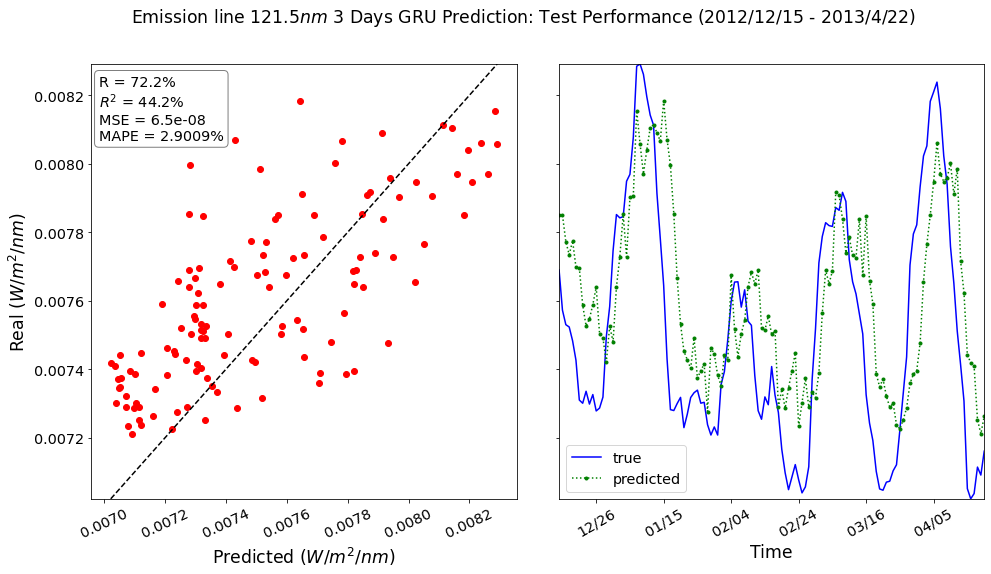

In [132]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)

plt.subplots_adjust(wspace=0.1)#, hspace=None)

mi = np.min([yTestP.min(),yTest.min()])
ma = np.max([yTestP.max(),yTest.max()])

yAxis = [mi,ma]

plt.suptitle(r"Emission line $121.5nm$ "+timeTerm+" "+net.upper()+" Prediction: Test Performance (2012/12/15 - 2013/4/22)", fontsize='xx-large')

ax1.scatter(yTest, yTestP, color='red')
ax1.set_xlabel('Predicted ($W/m^2/nm$)', labelpad=5, fontsize='xx-large')
ax1.set_ylabel('Real ($W/m^2/nm$)', labelpad=5, fontsize='xx-large')
# ax1.set_title('Test')
ax1.plot(yAxis,yAxis, color='black', 
         linestyle='--', label='optimal')
ax1.tick_params(axis='x', rotation=25, labelsize='x-large')
ax1.tick_params(axis='y', labelsize='x-large')

props = dict(boxstyle='round', facecolor='None', alpha=0.5)
# place a text box in upper left in axes coords
ax1.text(0.0175, 0.975, textstr, transform=ax1.transAxes, fontsize='x-large',
        verticalalignment='top', bbox=props)


ax2.plot(datesT,yTest,'b-',label='true')
ax2.plot(datesT,yTestP,'g.:',label='predicted')
ax2.set_ylim(yAxis)
ax2.set_xlim([datesT[0],datesT[-1]])
ax2.set_xlabel('Time', labelpad=5, fontsize='xx-large')
ax2.tick_params(axis='x', rotation=30, labelsize='x-large')
ax2.legend(fontsize='x-large')

fig.savefig('./Figures/SSI Predictions/121.5'+net.upper()+'_Test'+testSet+'_'+timeTerm+'.pdf', dpi=200, format='pdf', pad_inches=0.1)

In [85]:
S3_3 = np.asarray(np.loadtxt('./partial_output_files/Satire_121.5_129dias.csv'))
E3_3 = np.asarray(np.loadtxt('./partial_output_files/Empire_121.5_129dias.csv'))

Ploting and comparing the 50 first true and predicted values:

In [86]:
# fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(12, 6))
# #plt.figure()
# ax1.plot(yTrain,'b-',label='true')
# ax1.plot(yTrainP,'g.:',label='predicted')
# ax1.set_ylim((yTrain.min(),yTrain.max()))
# ax1.set_title('Training Performance')
# ax1.legend()

# #plt.figure()
# ax2.plot(yVal,'b-',label='true')
# ax2.plot(yValP,'g.:',label='predicted')
# ax2.set_ylim((yVal.min(),yVal.max()))
# ax2.set_title('Validation Performance')
# ax2.legend()

# ax3.plot(yTest,'b-',label='true')
# ax3.plot(yTestP,'g.:',label='predicted')
# #ax3.set_ylim((yTrain.min(),yTrain.max()))
# ax3.set_title('Test Performance')
# ax3.legend()

# ax4.plot(yTest,'b-',label='true')
# ax4.plot(E3_3,'g.:',label='predicted')
# ax4.set_ylim((yTest.min(),yTest.max()))
# ax4.set_title('EMPIRE')
# ax4.legend()

In [87]:
# fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12, 6), sharex=True, sharey=True)

# mi = np.min([yTestP.min(),yTest.min(),E3_3.min()])
# ma = np.max([yTestP.max(),yTest.max(),E3_3.max()])

# yAxis = [mi,ma]

# ax1.scatter(yTest, yTestP, color='red')
# # ax1.set_xlabel('Predicted')
# ax1.set_ylabel('Real')
# ax1.set_title('Test Performance')
# ax1.plot(yAxis,yAxis, color='black', 
#          linestyle='--', label='optimal')

# ax2.plot(yTest,'b-.',label='true')
# ax2.plot(yTestP,'g-.',label='predicted')
# ax2.set_ylim(yAxis)
# ax2.set_title('Test Performance')

# ax3.scatter(yTest, E3_3, color='red')
# ax3.set_xlabel('Predicted')
# ax3.set_ylabel('Real')
# # ax3.set_title('Test')
# ax3.plot(yAxis,yAxis, color='black', 
#          linestyle='--', label='optimal')

# ax4.plot(yTest,'b-.',label='true')
# ax4.plot(E3_3,'g-.',label='predicted')
# ax4.set_ylim(yAxis)
# # ax4.set_title('E Performance')
# ax4.legend()
# ax4.legend()

In [88]:
from matplotlib import dates

data3 = []
for i in Time3:
    data3.append(str(date.fromordinal(int(i))))

dates3 = dates.date2num(data3)

hfmt = dates.DateFormatter('%m/%d')

In [89]:
# ax = plt.gca()
# ax.xaxis.set_major_formatter(hfmt)

# plt.plot(dates3,yTest,'b-',label='true')
# plt.plot(dates3,yTestP,'g.:',label='predicted')
# #ax3.set_ylim((yTrain.min(),yTrain.max()))
# plt.title(r'Lyman-$\alpha$ 1 day forecast')
# plt.xlabel('Time')
# plt.ylabel(r'Ly-$\alpha$ line (W/$m^2$/nm)')
# plt.legend()

In [90]:
# import julian
# lAModel = np.asarray(np.loadtxt('./partial_output_files/lyman_alpha_model_ssi.csv',delimiter=','))

# stdTime = julian.from_jd(lAModel[-1,0], fmt='jd')
# print(stdTime)
# print(dates3.shape)
# print(lAModel.shape)


In [91]:
print(date.fromordinal(int(Time3[0])))
print(date.fromordinal(int(Time3[-1])))

2012-12-15
2013-04-22


In [92]:
# fig = plt.figure(figsize=(12, 6))

# ax = plt.gca()
# ax.xaxis.set_major_formatter(hfmt)

# plt.title(r'Lyman-$\alpha$ '+timeTerm+' Forecast: LSTM vs Physic Models (2012/12/15 to 2013/04/22)',fontsize='xx-large')
# plt.plot(dates3,yTest, linewidth = 2, color='black', linestyle='-', label = 'Real')
# plt.plot(dates3,yTestP, color='red', linestyle='--', label = 'LSTM')
# plt.plot(dates3,E3_3, color='green', linestyle='-.', label = 'EMPIRE')
# plt.plot(dates3,S3_3, color='blue', linestyle=':', label = 'SATIRE')
# #plt.plot(dates3,lAModel[:,2])
# plt.tick_params(labelsize='large')
# plt.xlabel('Time',fontsize='x-large')
# plt.ylabel(r'Ly-$\alpha$ line (W/$m^2$/nm)',fontsize='x-large')
# plt.legend(fontsize='large')
# fig.savefig('./Figures/SSI Predictions/'+net.upper()+'_Test'+testSet+'_PhysicalModels.png', dpi=200, format='png', pad_inches=0.1)

In [93]:
from matplotlib import dates

data3 = []
for i in Time3:
    data3.append(str(date.fromordinal(int(i))))

dates3 = dates.date2num(data3)

hfmt = dates.DateFormatter('%m/%d')

PermissionError: [Errno 13] Permission denied: './Figures/SSI Predictions/LSTM_Testset3_PhysicalModels.pdf'

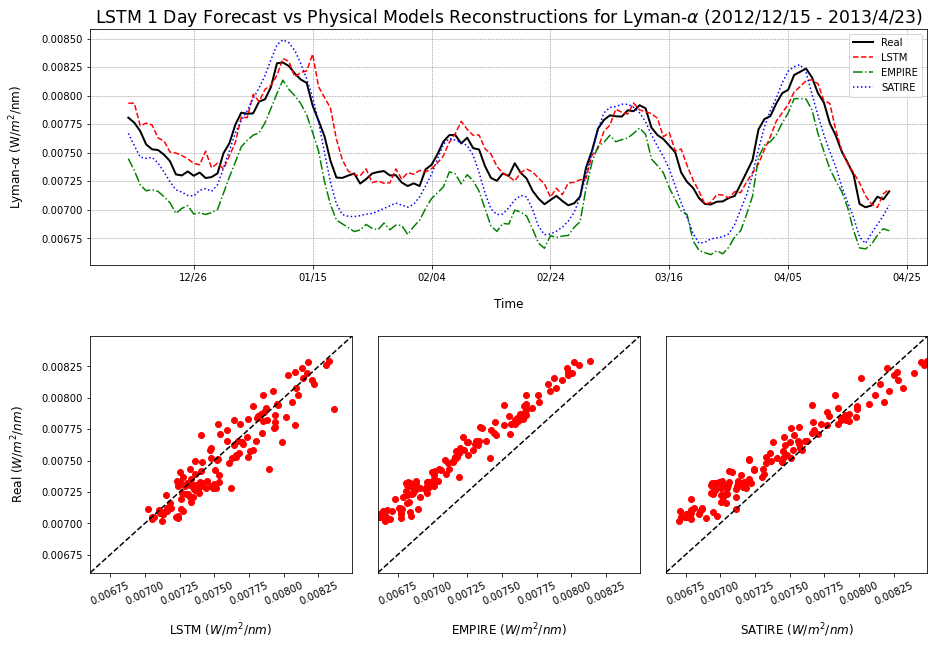

In [97]:
f = plt.figure(figsize=(15, 10))

minYAxis = np.min([np.min(yTest),np.min(yTestP),np.min(E3_3),np.min(S3_3)])
maxYAxis = np.max([np.max(yTest),np.max(yTestP),np.max(E3_3),np.max(S3_3)])

plt.subplots_adjust(wspace=0.1,hspace=0.3)

ax1 = plt.subplot(211)

ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)


ax1.set_title('LSTM '+timeTerm+r' Forecast vs Physical Models Reconstructions for Lyman-$\alpha$ (2012/12/15 - 2013/4/23)', fontsize='xx-large')
ax1.plot(dates3,yTest, linewidth = 2, color='black', linestyle='-', label = 'Real')
ax1.plot(dates3,yTestP, color='red', linestyle='--', label = 'LSTM')
ax1.plot(dates3,E3_3, color='green', linestyle='-.', label = 'EMPIRE')
ax1.plot(dates3,S3_3, color='blue', linestyle=':', label = 'SATIRE')
#plt.plot(dates3,lAModel[:,2])
ax1.set_xlabel('Time', fontsize='large', labelpad=15) #, fontweight='bold')
ax1.set_ylabel(r'Lyman-$\alpha$ (W/$m^2$/nm)', fontsize='large', labelpad=15)
ax1.legend()
ax1.grid(color = '#888888', linestyle = '--', linewidth = 0.5)

ax2 = plt.subplot(234)
ax2.tick_params(axis='x', rotation=25)
ax2.scatter(yTestP,yTest, color='red')
ax2.set_xlabel('LSTM ($W/m^2/nm$)', labelpad=15, fontsize='large') #, fontweight='bold')
ax2.set_ylabel('Real ($W/m^2/nm$)', labelpad=15, fontsize='large') #, fontsize='large', fontweight='bold')
# ax2.set_title('Training')
#plt.plot([-2,2],[-2,2])
ax2.plot([minYAxis, maxYAxis], [minYAxis, maxYAxis], color='black', 
         linestyle='--', label='optimal')
# ax2.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
ax2.set_xlim(minYAxis, maxYAxis)
ax2.set_ylim(minYAxis, maxYAxis)

ax3 = plt.subplot(235)
ax3.tick_params(axis='x', rotation=25)
ax3.scatter(E3_3,yTest, color='red')
ax3.set_xlabel('EMPIRE ($W/m^2/nm$)', labelpad=15, fontsize='large') #, fontweight='bold'
ax3.set_yticks([])
# ax3.set_ylabel('Real ($W/m^2$)')
# ax3.set_title('Validation')
#plt.plot([-2,2],[-2,2])
ax3.plot([minYAxis, maxYAxis], [minYAxis, maxYAxis], color='black', 
         linestyle='--', label='optimal')
# ax3.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
ax3.set_xlim(minYAxis, maxYAxis)
ax3.set_ylim(minYAxis, maxYAxis)

ax4 = plt.subplot(236)
ax4.tick_params(axis='x', rotation=25)
ax4.scatter(S3_3,yTest, color='red')
ax4.set_xlabel('SATIRE ($W/m^2/nm$)', labelpad=15, fontsize='large') #, fontweight='bold')
ax4.set_yticks([])
# ax4.set_ylabel('Real ($W/m^2$)')
# ax4.set_title('Validation')
#plt.plot([-2,2],[-2,2])
ax4.plot([minYAxis, maxYAxis], [minYAxis, maxYAxis], color='black', 
         linestyle='--', label='optimal')
ax4.set_xlim(minYAxis, maxYAxis)
ax4.set_ylim(minYAxis, maxYAxis)

f.savefig('./Figures/SSI Predictions/'+net.upper()+'_Test'+testSet+'_PhysicalModels.pdf', dpi=200, format='pdf', pad_inches=0.1)

In [96]:
# yTestP_LSTM = yTestP
# yTestP_GRU = yTestP
rnnR2 = r2_score(yTest, S3_3)
rnnR, a = stats.pearsonr(np.squeeze(yTest), np.squeeze(S3_3))
rnnMSE = mean_squared_error(yTest, S3_3)
rnnMAPE = mean_absolute_percentage_error(yTest, S3_3)

r = "{:.1%}".format(rnnR)
r2 = "{:.1%}".format(rnnR2)
mse = "{:.2}".format(rnnMSE)
mape = "{:.4%}".format(rnnMAPE)

textstrS = '\n'.join(('R_S = '+r,
                    r'$R^2$_S = '+r2,
                     'MSE_S = '+mse,
                     'MAPE_S = '+mape))
print(textstrS)

rnnR2 = r2_score(yTest, E3_3)
rnnR, a = stats.pearsonr(np.squeeze(yTest), np.squeeze(E3_3))
rnnMSE = mean_squared_error(yTest, E3_3)
rnnMAPE = mean_absolute_percentage_error(yTest, E3_3)

r = "{:.1%}".format(rnnR)
r2 = "{:.1%}".format(rnnR2)
mse = "{:.2}".format(rnnMSE)
mape = "{:.4%}".format(rnnMAPE)

textstrE = '\n'.join(('R_E = '+r,
                    r'$R^2$_E = '+r2,
                     'MSE_E = '+mse,
                     'MAPE_E = '+mape))
print('')
print(textstrE)

# [rnnR2, rnnR, rnnMSE, rnnMAPE]
rnn_lstm = np.asarray(lstm)

r = "{:.1%}".format(np.mean(rnn_lstm[:,1]))
r2 = "{:.1%}".format(np.mean(rnn_lstm[:,0]))
mse = "{:.2}".format(np.mean(rnn_lstm[:,2]))
mape = "{:.4%}".format(np.mean(rnn_lstm[:,3]))

textstr_lstm = '\n'.join(('R_lstm = '+r, 
                          r'$R^2$_lstm = '+r2,
                          'MSE_lstm = '+mse,
                          'MAPE_lstm = '+mape))
print('')
print(textstr_lstm)

rnn_gru = np.asarray(gru)

r = "{:.1%}".format(np.mean(rnn_gru[:,1]))
r2 = "{:.1%}".format(np.mean(rnn_gru[:,0]))
mse = "{:.2}".format(np.mean(rnn_gru[:,2]))
mape = "{:.4%}".format(np.mean(rnn_gru[:,3]))

textstr_gru = '\n'.join(('R_gru = '+r, 
                          r'$R^2$_gru = '+r2,
                          'MSE_gru = '+mse,
                          'MAPE_gru = '+mape))
print('')
print(textstr_gru)

R_S = 97.6%
$R^2$_S = 63.5%
MSE_S = 4.2e-08
MAPE_S = 2.4017%

R_E = 98.3%
$R^2$_E = 0.0%
MSE_E = 1.2e-07
MAPE_E = 4.4249%

R_lstm = 93.3%
$R^2$_lstm = 85.6%
MSE_lstm = 1.7e-08
MAPE_lstm = 1.3454%

R_gru = 93.2%
$R^2$_gru = 83.1%
MSE_gru = 2e-08
MAPE_gru = 1.4723%


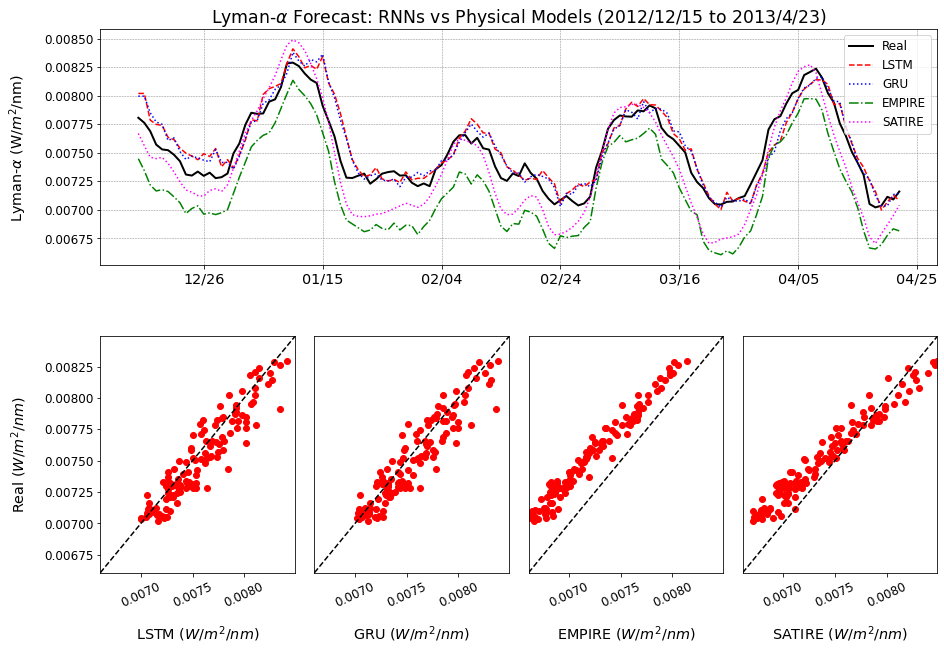

In [100]:
f = plt.figure(figsize=(15, 10))

minYAxis = np.min([np.min(yTest),np.min(yTestP),np.min(E3_3),np.min(S3_3)])
maxYAxis = np.max([np.max(yTest),np.max(yTestP),np.max(E3_3),np.max(S3_3)])

plt.subplots_adjust(wspace=0.1,hspace=0.3)

ax1 = plt.subplot(211)

ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)


ax1.set_title(r'Lyman-$\alpha$ Forecast: RNNs vs Physical Models (2012/12/15 to 2013/4/23)', fontsize='xx-large')
ax1.plot(dates3,yTest, linewidth = 2, color='black', linestyle='-', label = 'Real')
ax1.plot(dates3,yTestP_LSTM, color='red', linestyle='--', label = 'LSTM')
ax1.plot(dates3,yTestP_GRU, color='blue', linestyle=':', label = 'GRU')
ax1.plot(dates3,E3_3, color='green', linestyle='-.', label = 'EMPIRE')
ax1.plot(dates3,S3_3, color='magenta', linestyle=':', label = 'SATIRE')
#plt.plot(dates3,lAModel[:,2])
# ax1.set_xlabel('Time', fontsize='large', labelpad=15) #, fontweight='bold')
ax1.set_ylabel(r'Lyman-$\alpha$ (W/$m^2$/nm)', fontsize='x-large', labelpad=15)
ax1.legend()
ax1.grid(color = '#888888', linestyle = '--', linewidth = 0.5)
ax1.tick_params(axis='x', labelsize='x-large')
ax1.tick_params(axis='y', labelsize='large')
ax1.legend(fontsize='large')

ax2 = plt.subplot(245)
ax2.tick_params(axis='x', rotation=25, labelsize='large')
ax2.tick_params(axis='y', labelsize='large')
ax2.scatter(yTestP_LSTM,yTest, color='red')
ax2.set_xlabel('LSTM ($W/m^2/nm$)', labelpad=15, fontsize='x-large') #, fontweight='bold')
ax2.set_ylabel('Real ($W/m^2/nm$)', labelpad=15, fontsize='x-large') #, fontsize='large', fontweight='bold')
# ax2.set_title('Training')
#plt.plot([-2,2],[-2,2])
ax2.plot([minYAxis, maxYAxis], [minYAxis, maxYAxis], color='black', 
         linestyle='--', label='optimal')
# ax2.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
ax2.set_xlim(minYAxis, maxYAxis)
ax2.set_ylim(minYAxis, maxYAxis)

ax3 = plt.subplot(246)
ax3.tick_params(axis='x', rotation=25, labelsize='large')
ax3.tick_params(axis='y', labelsize='large')
ax3.scatter(yTestP_GRU,yTest, color='red')
ax3.set_xlabel('GRU ($W/m^2/nm$)', labelpad=15, fontsize='x-large') #, fontweight='bold')
ax3.set_yticks([])
# ax2.set_title('Training')
#plt.plot([-2,2],[-2,2])
ax3.plot([minYAxis, maxYAxis], [minYAxis, maxYAxis], color='black', 
         linestyle='--', label='optimal')
# ax2.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
ax3.set_xlim(minYAxis, maxYAxis)
ax3.set_ylim(minYAxis, maxYAxis)

ax4 = plt.subplot(247)
ax4.tick_params(axis='x', rotation=25, labelsize='large')
ax4.tick_params(axis='y', labelsize='large')
ax4.scatter(E3_3,yTest, color='red')
ax4.set_xlabel('EMPIRE ($W/m^2/nm$)', labelpad=15, fontsize='x-large') #, fontweight='bold'
ax4.set_yticks([])
# ax3.set_ylabel('Real ($W/m^2$)')
# ax3.set_title('Validation')
#plt.plot([-2,2],[-2,2])
ax4.plot([minYAxis, maxYAxis], [minYAxis, maxYAxis], color='black', 
         linestyle='--', label='optimal')
# ax3.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
ax4.set_xlim(minYAxis, maxYAxis)
ax4.set_ylim(minYAxis, maxYAxis)

ax5 = plt.subplot(248)
ax5.tick_params(axis='x', rotation=25, labelsize='large')
ax5.tick_params(axis='y', labelsize='large')
ax5.scatter(S3_3,yTest, color='red')
ax5.set_xlabel('SATIRE ($W/m^2/nm$)', labelpad=15, fontsize='x-large') #, fontweight='bold')
ax5.set_yticks([])
# ax4.set_ylabel('Real ($W/m^2$)')
# ax4.set_title('Validation')
#plt.plot([-2,2],[-2,2])
ax5.plot([minYAxis, maxYAxis], [minYAxis, maxYAxis], color='black', 
         linestyle='--', label='optimal')
ax5.set_xlim(minYAxis, maxYAxis)
ax5.set_ylim(minYAxis, maxYAxis)

f.savefig('./Figures/SSI Predictions/121.5_Test'+testSet+'_PhysicalModels.pdf', dpi=200, format='pdf', pad_inches=0.1)

7
[4, 16, 32, 64, 128, 256, 512]


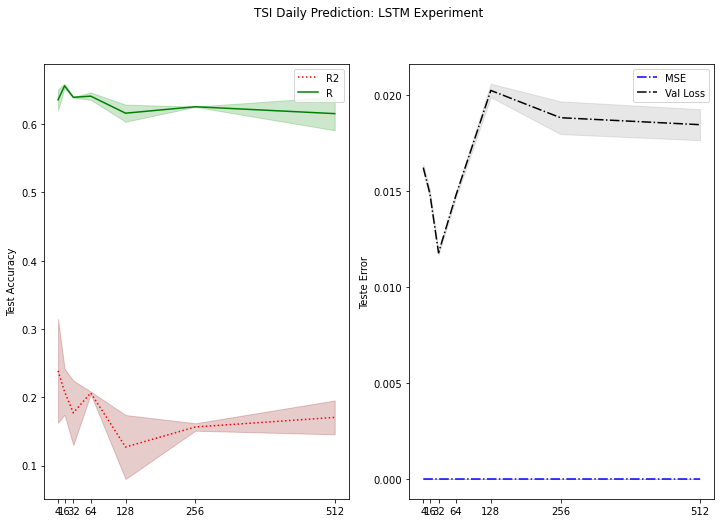

In [24]:
# df1 = np.asarray(lstm)
# error = np.asarray(error)

# n_tests = testsqtd #number of tests for each setting
# n_groups = int(df1.shape[0]/n_tests) #number of groups
# intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
# #groups = np.unique(df1[:, 0]).astype(np.int32) # Each group label
# groups = batchSizes
# colors = ['red', 'green', 'blue', 'black'] # boxplot's colors by type RNN
# print(n_groups)
# print(groups)

# R2MeansStds = [] # R2
# RMeansStds = [] # R
# MSEMeansStds = [] # MSE
# ValLossMeansStds = [] # Validation Loss

# for i in range(n_groups):
#     R2MeansStds.append([np.mean(df1[intervals[i]:intervals[i]+n_tests, 1]), np.std(df1[intervals[i]:intervals[i]+n_tests, 1])])
#     RMeansStds.append([np.mean(df1[intervals[i]:intervals[i]+n_tests, 2]), np.std(df1[intervals[i]:intervals[i]+n_tests, 2])])
#     MSEMeansStds.append([np.mean(df1[intervals[i]:intervals[i]+n_tests, 3]), np.std(df1[intervals[i]:intervals[i]+n_tests, 3])])
#     ValLossMeansStds.append([np.mean(error[intervals[i]:intervals[i]+n_tests, 1]), np.std(error[intervals[i]:intervals[i]+n_tests, 1])])

# R2MeansStds = np.asarray(R2MeansStds)
# RMeansStds = np.asarray(RMeansStds)
# MSEMeansStds = np.asarray(MSEMeansStds)
# ValLossMeansStds = np.asarray(ValLossMeansStds)

# fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

# plt.suptitle('TSI Daily Prediction: LSTM Experiment')

# ax1.plot(groups, R2MeansStds[:,0], c=colors[0], label='R2', linestyle=':')
# ax1.fill_between(groups, R2MeansStds[:,0] - R2MeansStds[:,1], R2MeansStds[:,0] + R2MeansStds[:,1], color='#880000', alpha=0.2)

# ax1.plot(groups, RMeansStds[:,0], c=colors[1], label='R', linestyle='-')
# ax1.fill_between(groups, RMeansStds[:,0] - RMeansStds[:,1], RMeansStds[:,0] + RMeansStds[:,1], color='#008800', alpha=0.2)

# ax2.plot(groups, MSEMeansStds[:,0], c=colors[2], label='MSE', linestyle='-.')
# ax2.fill_between(groups, MSEMeansStds[:,0] - MSEMeansStds[:,1], MSEMeansStds[:,0] + MSEMeansStds[:,1], color='#000088', alpha=0.2)

# ax2.plot(groups, ValLossMeansStds[:,0], c=colors[3], label='Val Loss', linestyle='-.')
# ax2.fill_between(groups, ValLossMeansStds[:,0] - ValLossMeansStds[:,1], ValLossMeansStds[:,0] + ValLossMeansStds[:,1], color='#888888', alpha=0.2)

# ax1.legend()
# ax2.legend()

# ax1.set_xticks(groups) # repositioning labels batchsize
# ax2.set_xticks(groups)
# ax1.set_ylabel('Test Accuracy')
# ax2.set_ylabel('Teste Error')
# plt.show()